In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load in data
loans = pd.read_csv('loan_data.csv')

In [5]:
#getting info on data and checking for nulls
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
#summary statistics on data
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
loans.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


# EDA

<AxesSubplot:>

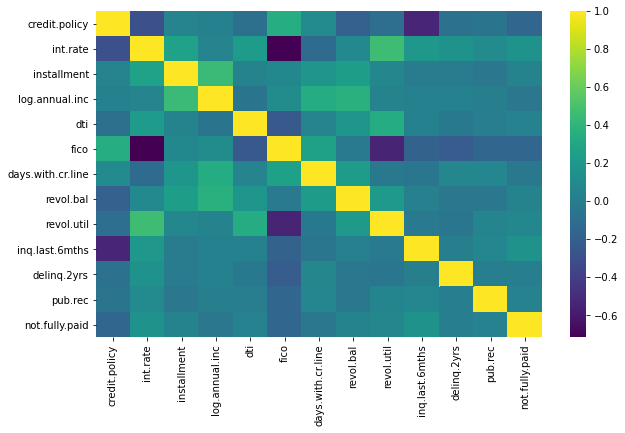

In [8]:
#checking for strong correlations
plt.figure(figsize=(10,6))
sns.heatmap(data=loans.corr(),cmap='viridis') #no strong corrs to note

Text(0.5, 0, 'FICO')

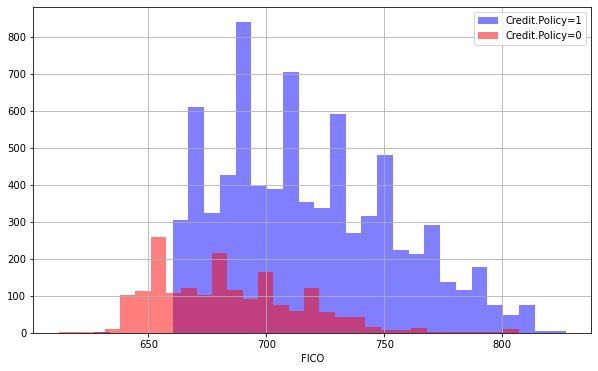

In [9]:
#plotting distribution of fico score in comparison to credit policy
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha = 0.5, color ='blue',
                                             bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha = 0.5, color ='red',
                                             bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

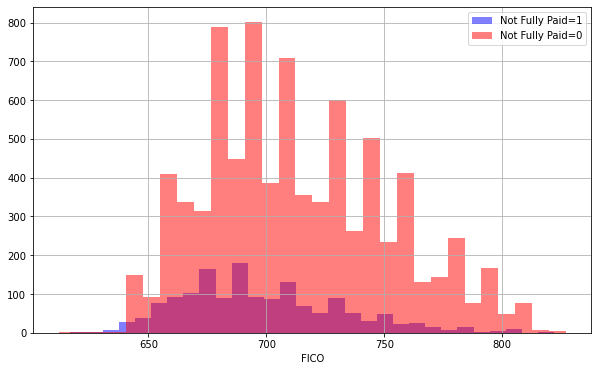

In [10]:
# simialr graph as above, instead with our target variable plotted
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5, color ='blue',
                                             bins=30,label='Not Fully Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.5, color ='red',
                                             bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

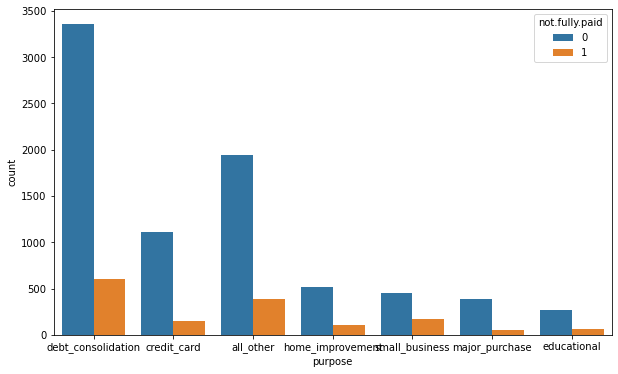

In [11]:
#countplot showing purpose of loans and if they were paid or not
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

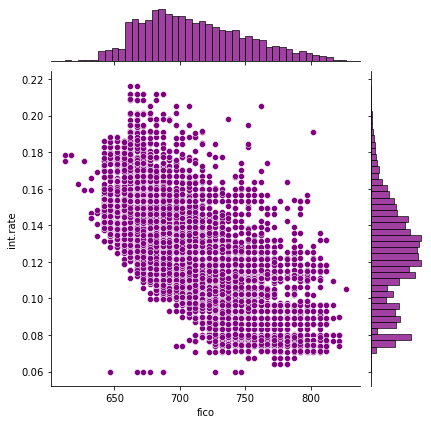

In [12]:
#looking at trend between fico scores and interest rates
sns.jointplot(x='fico',y='int.rate',data=loans,color = 'purple')

<Figure size 792x504 with 0 Axes>

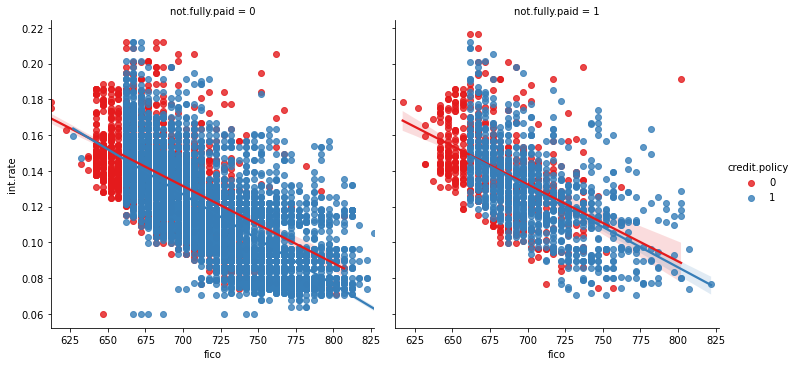

In [13]:
#taking graph above a step further
#seeing if the trend differed between fully paid loans and credit policy 

plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', hue="credit.policy", data=loans,
          col = 'not.fully.paid',palette='Set1')

# Model Creation

In [15]:
#load packages for models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
#transforming 'purpose' col into dummy variable 

cat_feats = ['purpose'] #Creates list of 1 element containing the string 'purpose'

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True) #adding cat_feat into loans

In [17]:
#split data
X = final_data.drop('not.fully.paid',axis=1)
y= final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

In [18]:
#train decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

In [19]:
#print reports
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2406
           1       0.23      0.26      0.24       468

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874

[[2000  406]
 [ 347  121]]


## Random Forest

In [20]:
#train random forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [21]:
#print reports
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.56      0.02      0.04       468

    accuracy                           0.84      2874
   macro avg       0.70      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874

[[2399    7]
 [ 459    9]]
